In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from funcoes_ajuda import descritiva

import shap
import matplotlib.pyplot as plt

/root/.local/share/virtualenvs/usp-ds-arnem-_IUna4d0/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('/home/usp-ds-arnem/data/aula3/houses_to_rent.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 665.0+ KB


In [4]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [7]:
df['floor'] = df.floor.str.replace('-','NaN').astype('float64')
for var in ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']:
    df[var] = df[var].str.replace('R$','')\
        .str.replace(',','')\
        .str.replace('Sem info','NaN')\
        .str.replace('Incluso','0').astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            6080 non-null   int64  
 1   area            6080 non-null   int64  
 2   rooms           6080 non-null   int64  
 3   bathroom        6080 non-null   int64  
 4   parking spaces  6080 non-null   int64  
 5   floor           4525 non-null   float64
 6   animal          6080 non-null   object 
 7   furniture       6080 non-null   object 
 8   hoa             5961 non-null   float64
 9   rent amount     6080 non-null   float64
 10  property tax    6080 non-null   float64
 11  fire insurance  6080 non-null   float64
 12  total           6080 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 665.0+ KB


In [9]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,NaN,acept,furnished,0.0,8000.0,1000.0,121.0,9121.0
1,0,64,2,1,1,10.0,acept,not furnished,540.0,820.0,122.0,11.0,1493.0
2,1,443,5,5,4,3.0,acept,furnished,4172.0,7000.0,1417.0,89.0,12680.0
3,1,73,2,2,1,12.0,acept,not furnished,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,NaN,not acept,not furnished,0.0,1200.0,41.0,16.0,1257.0


In [10]:
X_cols = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']
y_col = 'total'

In [11]:
X = pd.get_dummies(df[X_cols], drop_first=True)
y = df[y_col]

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


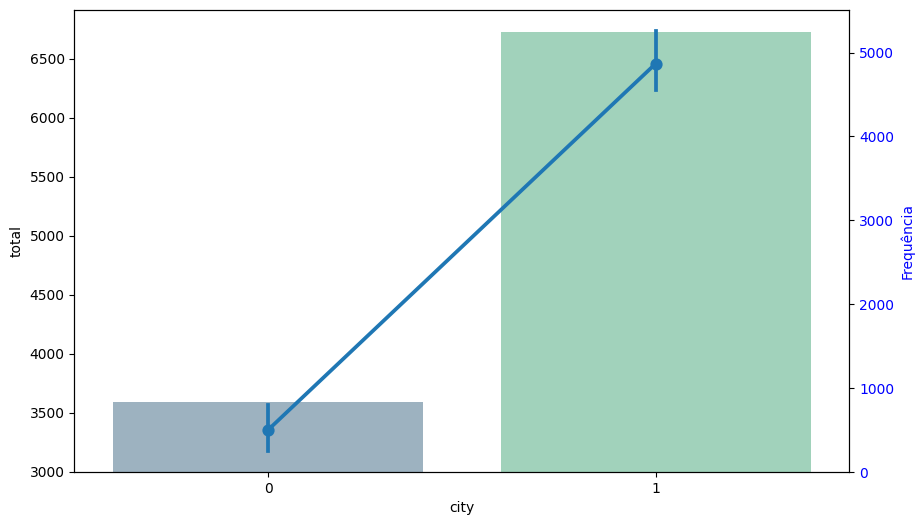

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


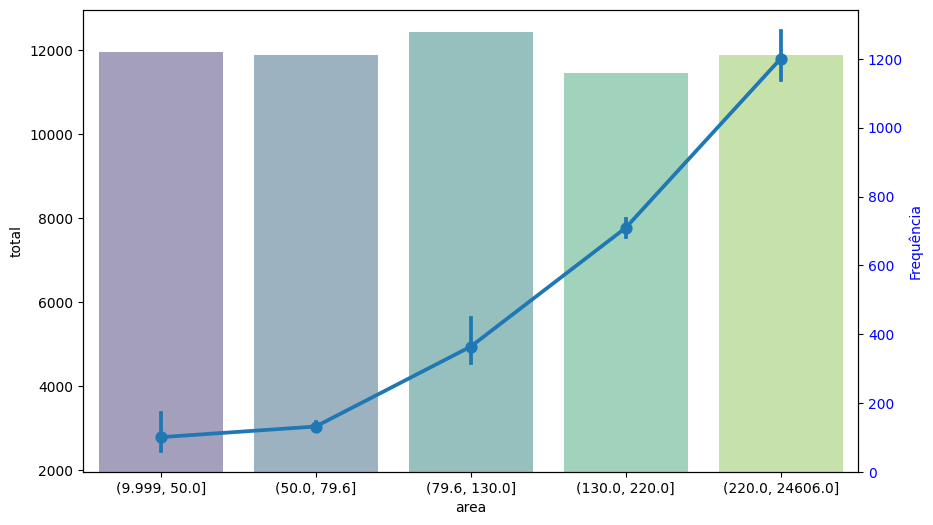

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


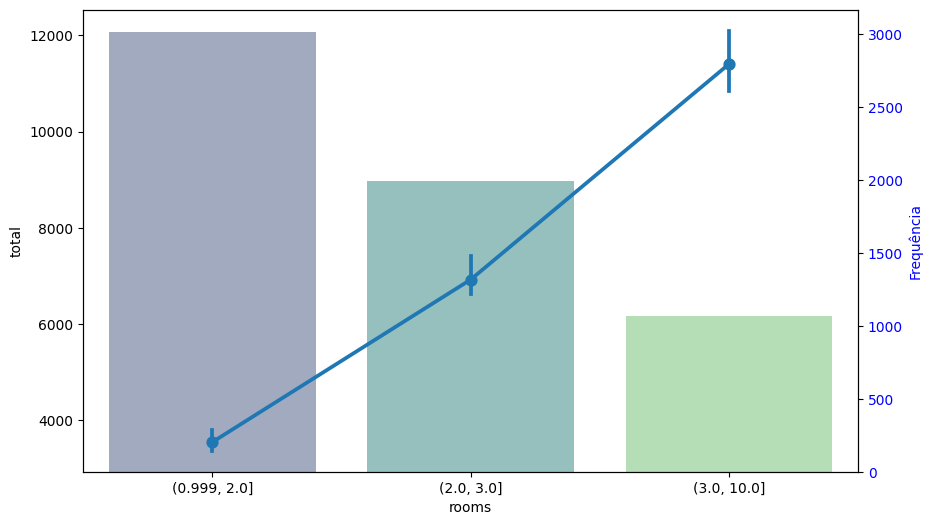

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


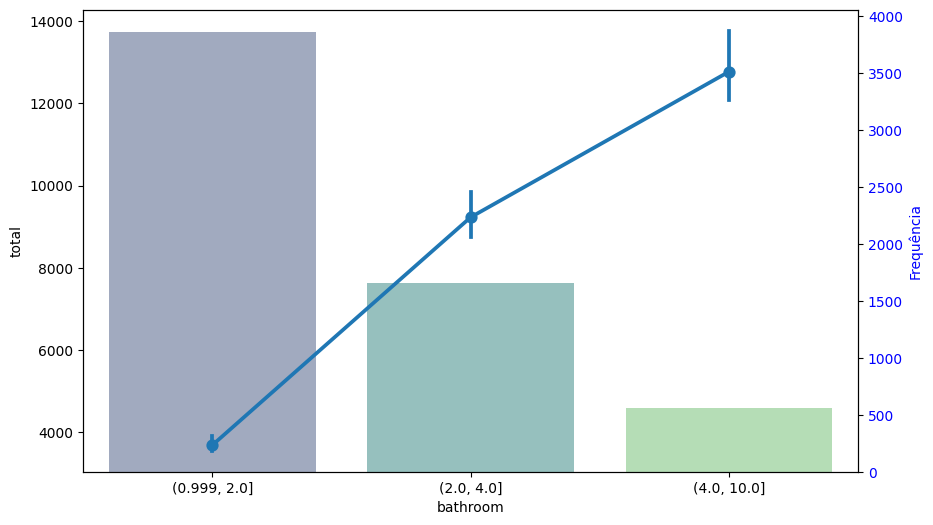

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


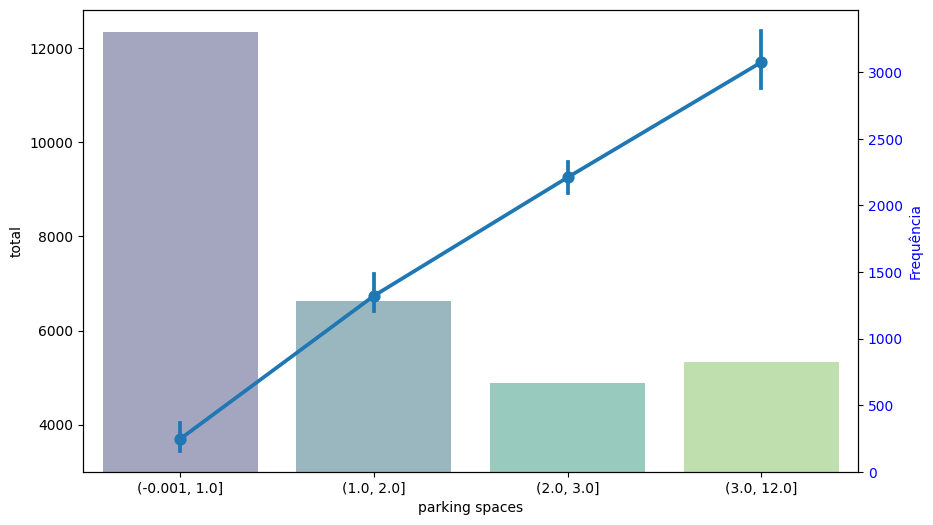

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


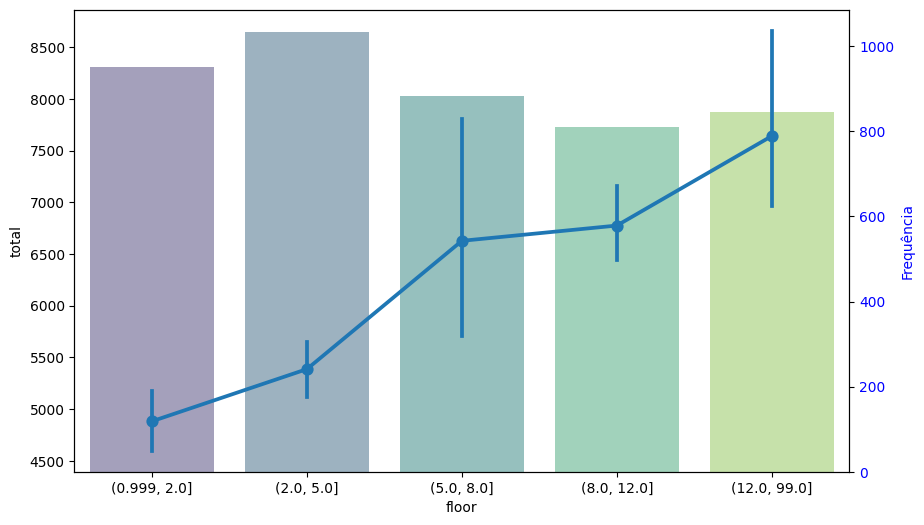

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


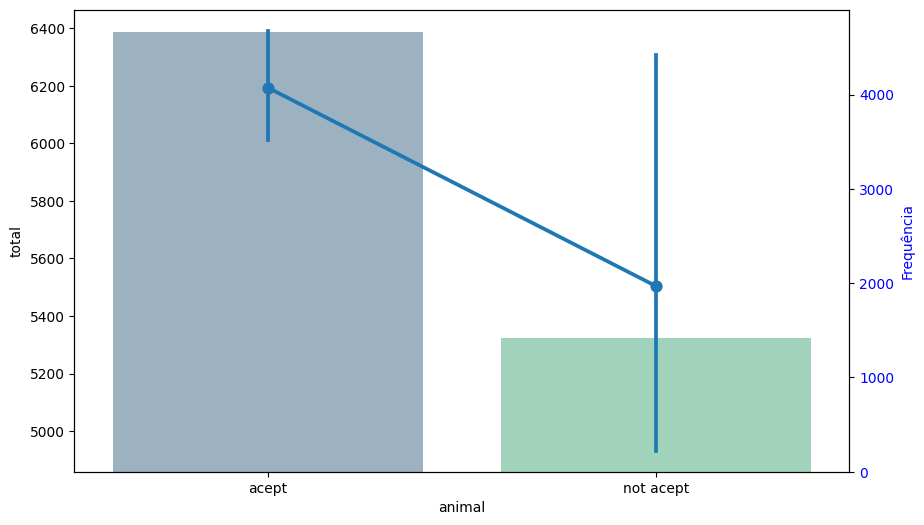

/home/usp-ds-arnem/notebooks/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


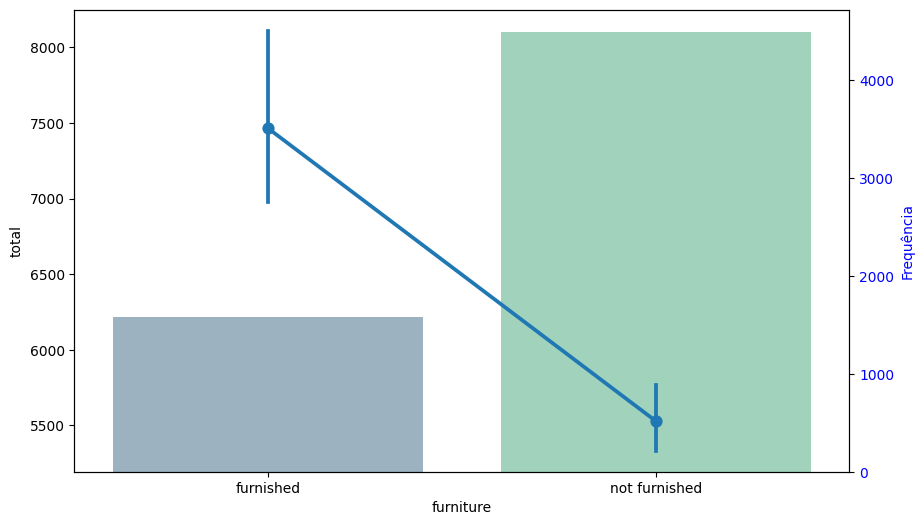

In [13]:
for col in X_cols:
    descritiva(df, col, y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4560, 8)
(4560,)
(1520, 8)
(1520,)


Random Forest

In [15]:
rf = RandomForestRegressor()
rf.fit(X, y)

r2_score(y_test, rf.predict(X_test))

0.6140876106043798

In [22]:
from sklearn.metrics import root_mean_squared_error, r2_score

In [25]:
y_pred = rf.predict(X)

for col in X_cols:
    print(f'{col}: {r2_score(y, y_pred)}')

city: 0.8724187607493752
area: 0.8724187607493752
rooms: 0.8724187607493752
bathroom: 0.8724187607493752
parking spaces: 0.8724187607493752
floor: 0.8724187607493752
animal: 0.8724187607493752
furniture: 0.8724187607493752


In [26]:
amostra = X_test.sample(frac=0.1)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(amostra)

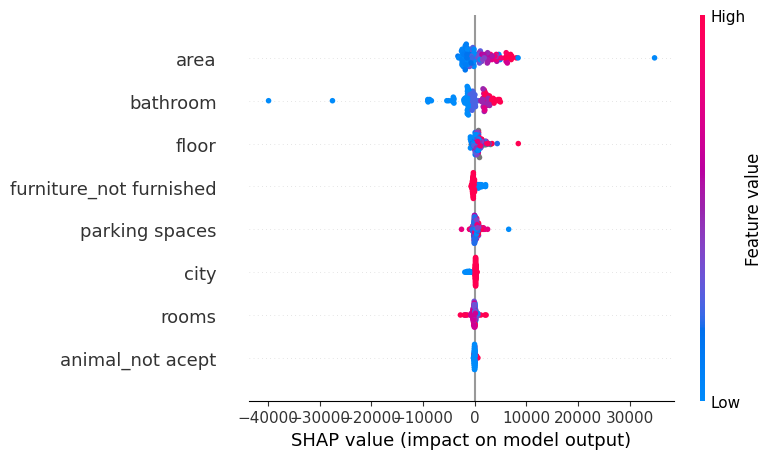

In [27]:
shap.summary_plot(shap_values, amostra, feature_names=X.columns)

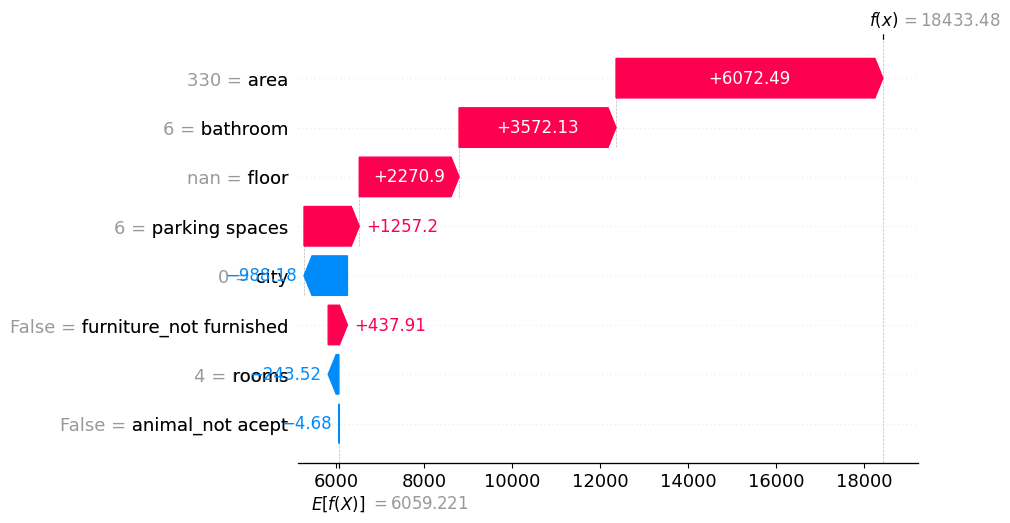

In [28]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], 
                                     base_values=explainer.expected_value, 
                                     data=amostra.iloc[0], 
                                     feature_names=amostra.columns))


<Axes: >

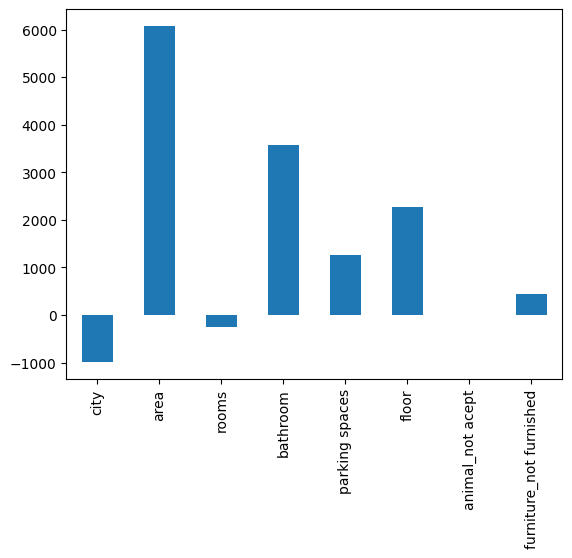

In [29]:
# Waterfall from scratch
df_shap = pd.DataFrame(shap_values, columns = X.columns)
df_shap.iloc[0].plot.bar()

In [30]:
# Forceplot
# Inicializar a visualização
shap.initjs()

# Explicação no nível de indivíduo (force plot para a primeira amostra de teste)
force_plot = shap.force_plot(explainer.expected_value, 
                shap_values[0], 
                amostra.iloc[0], 
                feature_names=amostra.columns)
plt.show()

In [32]:
# save file
shap.save_html("/home/usp-ds-arnem/images/force_plot.html", force_plot)

Shap - extra examples

In [4]:
import matplotlib.pylab as pl
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split

import shap
shap.initjs()

In [5]:
X, y = shap.datasets.adult() 
X_display, y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [7]:
X_display.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


XGBoost

[0]	test-logloss:0.54663
[100]	test-logloss:0.36398
[200]	test-logloss:0.31758
[300]	test-logloss:0.30065
[400]	test-logloss:0.29170
[500]	test-logloss:0.28655
[600]	test-logloss:0.28358
[700]	test-logloss:0.28174
[800]	test-logloss:0.28061
[900]	test-logloss:0.27988
[1000]	test-logloss:0.27939
[1100]	test-logloss:0.27906
[1178]	test-logloss:0.27887


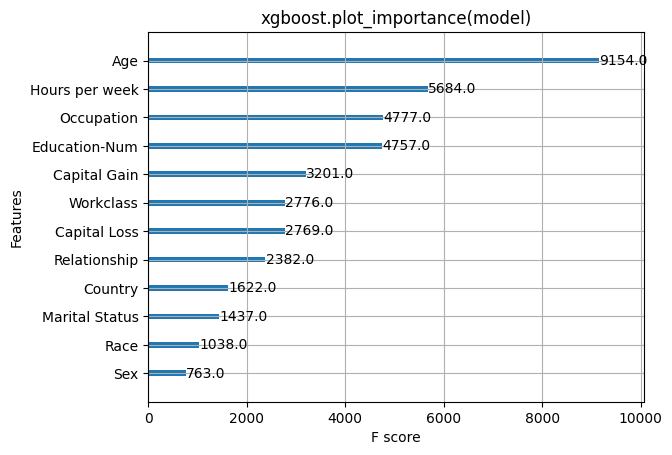

In [10]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
}
model = xgboost.train(
    params,
    d_train,
    5000,
    evals=[(d_test, "test")],
    verbose_eval=100,
    early_stopping_rounds=20,
)

xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [11]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

#%%
grafico = shap.force_plot(explainer.expected_value, 
                          shap_values[0, :], 
                          X_display.iloc[0, :])

shap.save_html("/home/usp-ds-arnem/images/force_plot_adult.html", grafico)

In [12]:
grafico2 = shap.force_plot(explainer.expected_value, 
                           shap_values[:1000, :], 
                           X_display.iloc[:1000, :])
shap.save_html("/home/usp-ds-arnem/images/force_plot2_adult.html", grafico2)


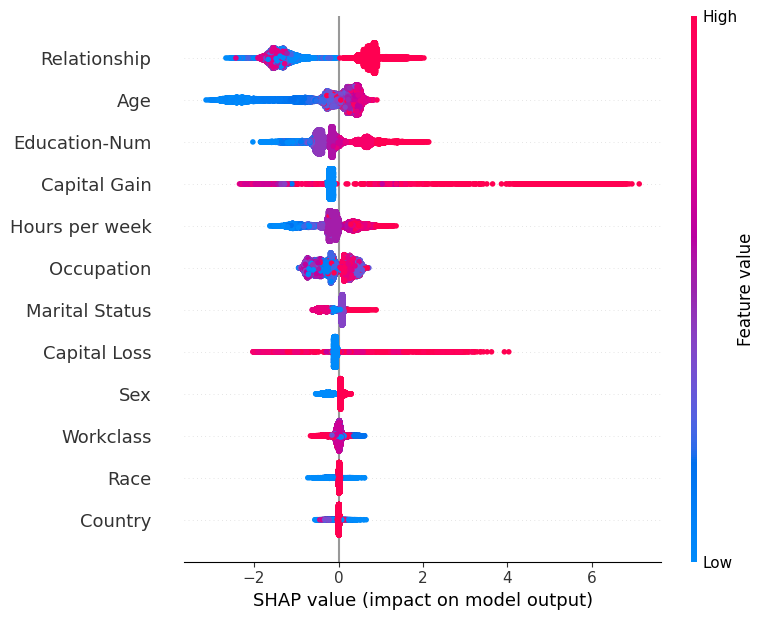

In [13]:
shap.summary_plot(shap_values, X)

Agora na base Titanic

In [15]:
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split

import shap

In [16]:
df = pd.read_pickle('/home/usp-ds-arnem/data/titanic.pkl')

X = df.drop(columns='survived')
y = df['survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

[0]	test-logloss:0.66307
[100]	test-logloss:0.49218
[200]	test-logloss:0.46064
[218]	test-logloss:0.46169


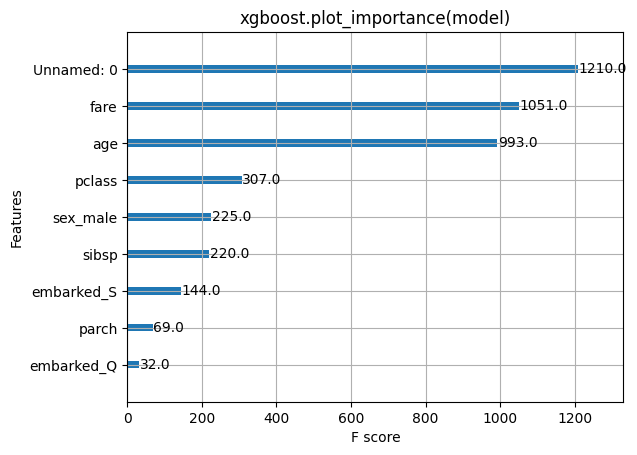

In [18]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
}
model = xgboost.train(
    params,
    d_train,
    5000,
    evals=[(d_test, "test")],
    verbose_eval=100,
    early_stopping_rounds=20,
)

xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [19]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [20]:
grafico = shap.force_plot(explainer.expected_value, 
                          shap_values[0, :], 
                          X.iloc[0, :])

shap.save_html("/home/usp-ds-arnem/images/force_plot_titanic.html", grafico)

In [21]:
grafico2 = shap.force_plot(explainer.expected_value, 
                           shap_values, 
                           X)
shap.save_html("/home/usp-ds-arnem/images/force_plot2_titanic.html", grafico2)


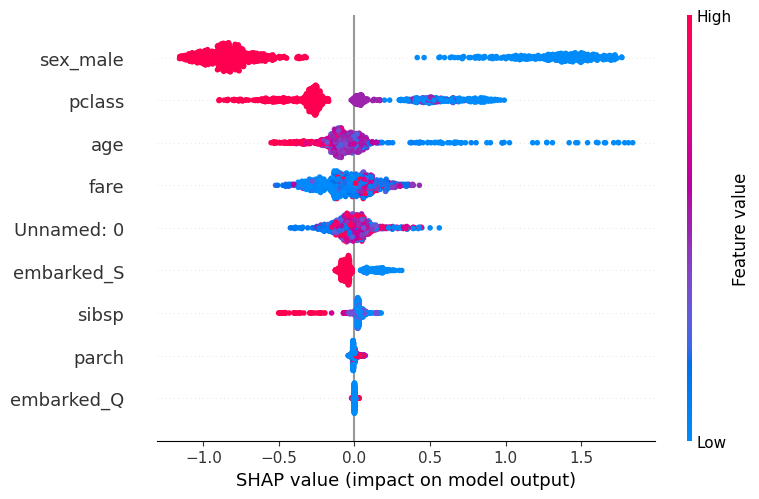

In [22]:
shap.summary_plot(shap_values, X)

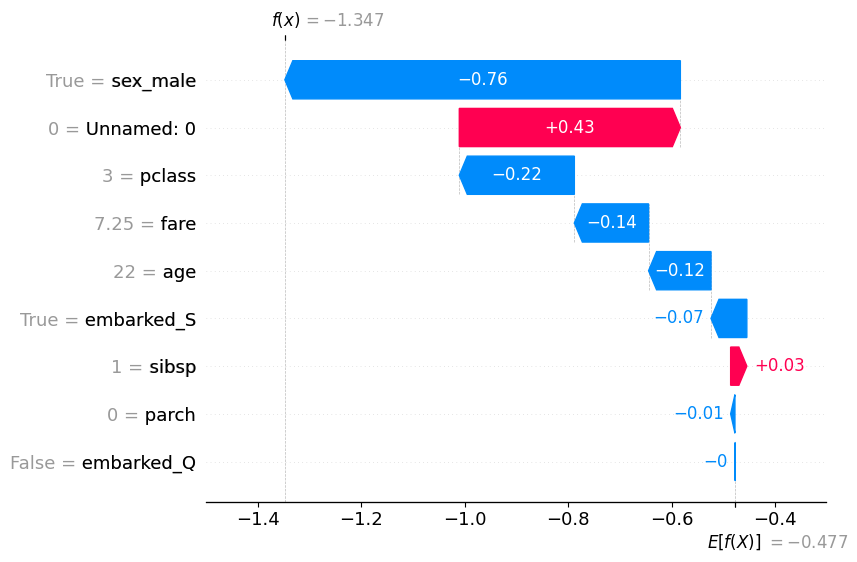

In [23]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], 
                                     base_values=explainer.expected_value, 
                                     data=X.iloc[0], 
                                     feature_names=X.columns))
